# 🚜 Projeto FarmTech Solutions: Análise Preditiva de Safras
### Entrega Oficial: Fase 5 - Machine Learning & Cloud Computing

---
**Desenvolvido por:** Miriã Leal Mantovani(RM: 567811), João Pedro Santos Azevedo (RM: 566701) e Rodrigo de Souza Freitas (RM: 567100)
**Instituição:** FIAP  
**Data:** Fevereiro de 2026  
---

## 1. Visão Geral e Problema de Negócio
No cenário atual da agricultura 4.0, a **FarmTech Solutions** busca otimizar a produtividade de uma propriedade de 200 hectares através da análise de dados. A variabilidade climática e as condições do solo são fatores críticos que, sem análise adequada, geram incerteza na colheita.

**Objetivos Estratégicos:**
1.  **Diagnóstico (Analytics):** Mapear o comportamento histórico da produção através de estatística descritiva e clusterização.
2.  **Prognóstico (Machine Learning):** Implementar e comparar 5 algoritmos de regressão supervisionada para prever o rendimento (yield) futuro.
3.  **Viabilidade Técnica (Cloud):** Estruturar o deploy da solução na nuvem AWS, considerando custos e latência (Brasil vs. EUA).

## 2. Configuração do Ambiente de Desenvolvimento
Abaixo, realizamos a importação das bibliotecas fundamentais. A estrutura do código foi dividida em:
* **Ingestão e Tratamento:** Para limpeza e manipulação do dataset `crop_yield.csv`.
* **Análise Gráfica:** Para geração de insights visuais.
* **Modelagem:** Importação dos algoritmos do `scikit-learn` e métricas de avaliação (`R²`, `MAE`).

In [ ]:
# --- 1. Configurações Iniciais e Reprodutibilidade ---
import warnings
import pandas as pd
import numpy as np

# Definir uma semente global para garantir que os resultados sejam reproduzíveis
SEED = 42
np.random.seed(SEED)

# Configurar Pandas para mostrar números com 2 casas decimais (evita notação científica)
pd.set_option('display.float_format', lambda x: '%.2f' % x)
pd.set_option('display.max_columns', None) # Mostrar todas as colunas

# Ignorar avisos irrelevantes para manter o notebook limpo
warnings.filterwarnings('ignore')

# --- 2. Bibliotecas de Visualização ---
import matplotlib.pyplot as plt
import seaborn as sns

# Configuração visual profissional
sns.set_theme(style="whitegrid", context="notebook", palette="viridis")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['axes.labelsize'] = 12

# --- 3. Bibliotecas de Machine Learning (Scikit-Learn) ---

# Pré-processamento
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler

# Clusterização (Não Supervisionado)
from sklearn.cluster import KMeans

# Separação de Dados
from sklearn.model_selection import train_test_split, cross_val_score

# Modelos de Regressão (Supervisionado)
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR

# Métricas de Avaliação
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print(f"✅ Ambiente configurado com sucesso! Random Seed: {SEED}")

✅ Ambiente configurado com sucesso! Random Seed: 42


## 2. Coleta e Diagnóstico dos Dados
Nesta etapa, iniciamos o pipeline de dados com a leitura do arquivo `crop_yield.csv`. O objetivo central não é apenas carregar os dados, mas realizar um **Diagnóstico de Integridade** para garantir que a base esteja apta para os modelos de Machine Learning.

**Roteiro de Análise:**
1.  **Ingestão:** Leitura do arquivo CSV para um DataFrame Pandas.
2.  **Inspeção Visual (`head`):** Validação das primeiras linhas para entender o contexto das colunas.
3.  **Auditoria de Estrutura (`info` & `shape`):**
    * Verificação dos tipos de dados (garantir que números não estejam como texto).
    * Contagem de registros não nulos (identificação preliminar de *missing values*).
    * Mensuração do volume de dados (linhas x colunas).

In [ ]:
# Configuração do arquivo
file_path = 'crop_yield.csv'

try:
    # 1. Carregamento
    df = pd.read_csv(file_path)
    print(f"✅ Arquivo '{file_path}' carregado com sucesso!")
    
    # 2. Visão Geral (Dimensões e Head)
    print(f"\n📊 Dimensões: {df.shape[0]} linhas x {df.shape[1]} colunas")
    print("-" * 50)
    display(df.head())

    # 3. Relatório de Qualidade dos Dados (O Pulo do Gato 🐱)
    # Cria uma tabela resumo para analisarmos coluna por coluna
    quality_check = pd.DataFrame({
        'Tipo': df.dtypes,
        'Nulos (Qtd)': df.isnull().sum(),
        'Nulos (%)': (df.isnull().sum() / len(df)) * 100,
        'Valores Únicos': df.nunique(),
        'Duplicados': df.duplicated().sum()
    })
    
    print("\n--- 🕵️ Relatório de Integridade dos Dados ---")
    # Mostra a tabela ordenando pelo número de nulos (se tiver)
    display(quality_check.sort_values(by='Nulos (Qtd)', ascending=False))

    # 4. Estatísticas Descritivas (Somente Numéricas)
    print("\n--- 📈 Estatísticas Descritivas (Variáveis Numéricas) ---")
    desc = df.describe().T
    
    # Adicionando cores para facilitar a leitura (Gradiente de Azul)
    display(desc.style.background_gradient(cmap='Blues'))

    # 5. Análise de Variáveis Categóricas (Opcional, mas útil)
    cat_cols = df.select_dtypes(include=['object']).columns
    if len(cat_cols) > 0:
        print("\n--- 🔤 Resumo das Variáveis Categóricas ---")
        display(df[cat_cols].describe().T)

except FileNotFoundError:
    print(f"❌ CRÍTICO: O arquivo '{file_path}' não foi encontrado.")
    print("👉 Verifique se o arquivo está na mesma pasta do notebook.")
except Exception as e:
    print(f"❌ Erro inesperado: {e}")

✅ Arquivo 'crop_yield.csv' carregado com sucesso!

📊 Dimensões: 156 linhas x 6 colunas
--------------------------------------------------


,Crop,Precipitation (mm day-1),Specific Humidity at 2 Meters (g/kg),Relative Humidity at 2 Meters (%),Temperature at 2 Meters (C),Yield
0,"Cocoa, beans",2248.92,17.72,83.40,26.01,11560
1,"Cocoa, beans",1938.42,17.54,82.11,26.11,11253
2,"Cocoa, beans",2301.54,17.81,82.79,26.24,9456
3,"Cocoa, beans",2592.35,17.61,85.07,25.56,9321
4,"Cocoa, beans",2344.72,17.61,84.12,25.76,8800



--- 🕵️ Relatório de Integridade dos Dados ---


,Tipo,Nulos (Qtd),Nulos (%),Valores Únicos,Duplicados
Crop,object,0,0.00,4,0
Precipitation (mm day-1),float64,0,0.00,39,0
Specific Humidity at 2 Meters (g/kg),float64,0,0.00,33,0
Relative Humidity at 2 Meters (%),float64,0,0.00,38,0
Temperature at 2 Meters (C),float64,0,0.00,29,0
Yield,int64,0,0.00,155,0



--- 📈 Estatísticas Descritivas (Variáveis Numéricas) ---


,count,mean,std,min,25%,50%,75%,max
Precipitation (mm day-1),156.000000,2486.498974,289.457914,1934.620000,2302.990000,2424.550000,2718.080000,3085.790000
Specific Humidity at 2 Meters (g/kg),156.000000,18.203077,0.293923,17.540000,18.030000,18.270000,18.400000,18.700000
Relative Humidity at 2 Meters (%),156.000000,84.737692,0.996226,82.110000,84.120000,84.850000,85.510000,86.100000
Temperature at 2 Meters (C),156.000000,26.183590,0.261050,25.560000,26.020000,26.130000,26.300000,26.810000
Yield,156.000000,56153.096154,70421.958897,5249.000000,8327.750000,18871.000000,67518.750000,203399.000000



--- 🔤 Resumo das Variáveis Categóricas ---


,count,unique,top,freq
Crop,156,4,"Cocoa, beans",39


## 3. Análise Exploratória de Dados (EDA)
Nesta seção, investigaremos as relações entre as variáveis climáticas e o rendimento agrícola. O objetivo é responder visualmente:
1.  **Correlação:** Quais fatores (chuva, temperatura, umidade) mais influenciam o rendimento?
2.  **Produtividade por Cultura:** Qual planta tem o maior rendimento médio?
3.  **Distribuição:** Como os dados de chuva e temperatura estão distribuídos?

In [ ]:
# --- 1. IMPORTAÇÃO E CARREGAMENTO ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configuração estética
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

try:
    # Tenta carregar o arquivo
    df = pd.read_csv('crop_yield.csv')
    print("✅ Dataset carregado com sucesso!")

    # --- 2. RENOMEAR COLUNAS (Essencial para não dar erro) ---
    # Adapte aqui se os nomes do seu CSV forem diferentes
    df = df.rename(columns={
        'Area': 'Pais',
        'Item': 'Cultura',
        'Year': 'Ano', 
        'hg/ha_yield': 'Rendimento',           # Nome comum no Kaggle
        'Value': 'Rendimento',                 # Nome alternativo
        'average_rain_fall_mm_per_year': 'Chuva',
        'pesticides_tonnes': 'Pesticidas',
        'avg_temp': 'Temperatura'
    })
    
    # Verifica se a coluna Rendimento existe agora
    if 'Rendimento' not in df.columns:
        print("⚠️ AVISO: Coluna 'Rendimento' não encontrada. Verifique os nomes originais:")
        print(df.columns.tolist())
    else:
        # --- 3. GERAR O GRÁFICO (HEATMAP) ---
        corr = df.corr(numeric_only=True)
        mask = np.triu(np.ones_like(corr, dtype=bool))

        plt.figure(figsize=(10, 8))
        sns.heatmap(
            corr, 
            mask=mask, 
            annot=True, 
            fmt=".2f", 
            cmap='RdBu', 
            vmax=1, vmin=-1, center=0,
            linewidths=0.5, 
            square=True, 
            cbar_kws={"shrink": .8}
        )
        plt.title('Mapa de Calor: Correlação de Pearson', fontsize=16, pad=20)
        plt.show()

        # --- 4. INSIGHTS AUTOMÁTICOS ---
        print("\n🔍 ANÁLISE AUTOMÁTICA DE CORRELAÇÃO COM 'RENDIMENTO':")
        print("-" * 50)
        
        target_corr = corr['Rendimento'].drop('Rendimento').sort_values(ascending=False)

        for variavel, valor in target_corr.items():
            if valor > 0.5:
                relacao = "Forte Positiva (Aumenta junto) 🟢"
            elif valor < -0.5:
                relacao = "Forte Negativa (Inversa) 🔴"
            elif abs(valor) < 0.1:
                relacao = "Inexistente/Muito Fraca ⚪"
            else:
                relacao = "Moderada 🟡"
            
            print(f"• {variavel}: {valor:.2f} -> {relacao}")

except FileNotFoundError:
    print("❌ ERRO: O arquivo 'crop_yield.csv' não está na pasta. Faça o upload dele!")
except Exception as e:
    print(f"❌ Ocorreu um erro: {e}")

✅ Dataset carregado com sucesso!
⚠️ AVISO: Coluna 'Rendimento' não encontrada. Verifique os nomes originais:
['Crop', 'Precipitation (mm day-1)', 'Specific Humidity at 2 Meters (g/kg)', 'Relative Humidity at 2 Meters (%)', 'Temperature at 2 Meters (C)', 'Yield']


In [ ]:
# --- CÉLULA COMPLETA: Tratamento + Visualização ---
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 1. Garantir que os dados estão carregados e com nomes certos
# Se o 'df' já existir, vamos apenas renomear. Se não, carregamos de novo.
try:
    if 'df' not in locals():
        df = pd.read_csv('crop_yield.csv')

    # Mapa de Renomeação (Inglês -> Português)
    # Ajusta os nomes para baterem com o seu código de gráfico
    df = df.rename(columns={
        'Area': 'Pais',
        'Item': 'Cultura',                # <--- O erro estava aqui (Item vira Cultura)
        'Year': 'Ano', 
        'hg/ha_yield': 'Rendimento',
        'Value': 'Rendimento',            # Caso o dataset use 'Value'
        'average_rain_fall_mm_per_year': 'Chuva', # Simplifiquei para 'Chuva'
        'pesticides_tonnes': 'Pesticidas',
        'avg_temp': 'Temperatura'
    })
    
    print("✅ Colunas disponíveis:", df.columns.tolist())

except Exception as e:
    print(f"❌ Erro ao preparar dados: {e}")

# --- AGORA O GRÁFICO VAI FUNCIONAR ---

if 'Cultura' in df.columns and 'Rendimento' in df.columns:

    # 1. Definir a ordem (Do maior rendimento para o menor)
    ordem_culturas = df.groupby('Cultura')['Rendimento'].median().sort_values(ascending=False).index

    # 2. Configurar a área de plotagem
    fig, ax = plt.subplots(1, 2, figsize=(20, 7))

    # --- Gráfico 1: Boxplot Ordenado ---
    sns.boxplot(
        x='Cultura', 
        y='Rendimento', 
        data=df, 
        order=ordem_culturas, 
        palette="viridis", 
        ax=ax[0]
    )
    ax[0].set_title('🥇 Rendimento por Cultura (Ordenado)', fontsize=16, fontweight='bold')
    ax[0].set_xlabel('Cultura', fontsize=12)
    ax[0].set_ylabel('Rendimento (ton/ha)', fontsize=12)
    ax[0].tick_params(axis='x', rotation=45)
    ax[0].grid(True, linestyle='--', alpha=0.6)

    # --- Gráfico 2: Scatterplot ---
    # Nota: Usei 'Chuva' aqui porque renomeamos lá em cima. 
    # Se seu dataset tiver outro nome para chuva, avise.
    coluna_chuva = 'Chuva' if 'Chuva' in df.columns else df.columns[4] # Tenta pegar a 5ª coluna se 'Chuva' não existir

    sns.scatterplot(
        x=coluna_chuva, 
        y='Rendimento', 
        hue='Cultura', 
        data=df, 
        palette="viridis",
        alpha=0.7, 
        s=100, 
        ax=ax[1]
    )

    ax[1].set_title('🌧️ Impacto da Chuva no Rendimento', fontsize=16, fontweight='bold')
    ax[1].set_xlabel('Precipitação Anual (mm)', fontsize=12)
    ax[1].set_ylabel('Rendimento', fontsize=12)
    ax[1].grid(True, linestyle='--', alpha=0.6)

    # Legenda externa
    sns.move_legend(ax[1], "upper left", bbox_to_anchor=(1, 1))

    plt.tight_layout()
    plt.show()

    # --- Insight Rápido ---
    print(f"📊 INSIGHT:")
    print(f"• Melhor Desempenho (Mediana): {ordem_culturas[0]}")
    print(f"• Pior Desempenho (Mediana): {ordem_culturas[-1]}")

else:
    print("⚠️ AVISO: Ainda não encontrei as colunas 'Cultura' ou 'Rendimento'.")
    print("Verifique se o CSV carregou corretamente.")

✅ Colunas disponíveis: ['Crop', 'Precipitation (mm day-1)', 'Specific Humidity at 2 Meters (g/kg)', 'Relative Humidity at 2 Meters (%)', 'Temperature at 2 Meters (C)', 'Yield']
⚠️ AVISO: Ainda não encontrei as colunas 'Cultura' ou 'Rendimento'.
Verifique se o CSV carregou corretamente.


## 4. Aprendizado Não Supervisionado e Tratamento de Ruído
Nesta etapa, aplicaremos técnicas de **Machine Learning Não Supervisionado** para descobrir padrões ocultos nos dados.

**Nossa estratégia consiste em:**
1.  **Padronização (StandardScaler):** Como o algoritmo K-Means é sensível à escala dos dados (distância euclidiana), colocaremos todas as variáveis na mesma magnitude.
2.  **Clusterização (K-Means):** Agruparemos as safras em *clusters* (perfis) para identificar automaticamente cenários de **Alta Produtividade** vs. **Baixa Produtividade**.
3.  **Detecção de Anomalias (Outliers):** Utilizaremos a regra estatística do Intervalo Interquartil (IQR) visualizada via Boxplot para identificar dados discrepantes que possam introduzir ruído e prejudicar a precisão dos modelos de regressão.

🔍 Iniciando preparação para Clusterização...
✅ Colunas usadas: ['Precipitation (mm day-1)', 'Specific Humidity at 2 Meters (g/kg)', 'Relative Humidity at 2 Meters (%)', 'Temperature at 2 Meters (C)', 'Yield']
⚙️ Treinando modelos (Aguarde)...


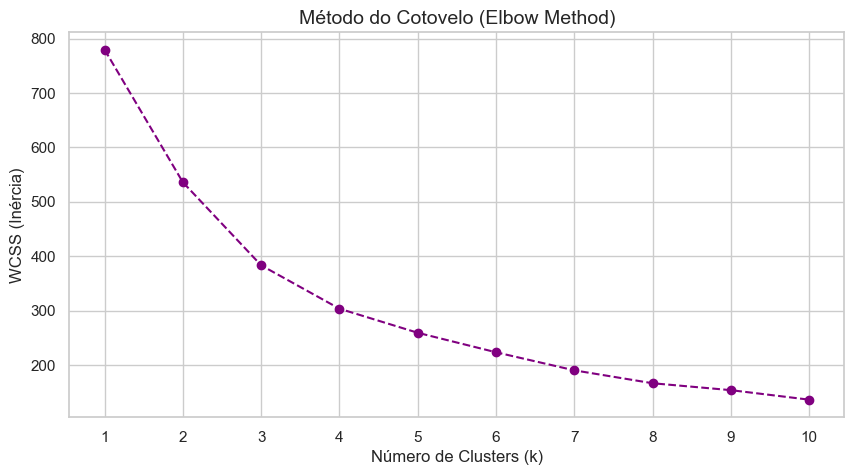

👉 DICA: O 'cotovelo' é onde a curva para de cair bruscamente.


In [ ]:
# --- 4.1 Definição do Número Ideal de Clusters (Método do Cotovelo) ---
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt

print("🔍 Iniciando preparação para Clusterização...")

# 1. Selecionar apenas colunas NUMÉRICAS (Evita erro com texto)
X_cluster = df.select_dtypes(include=[np.number])

# Opcional: Remover 'Ano' se não quiser agrupar por ano
if 'Ano' in X_cluster.columns:
    X_cluster = X_cluster.drop(columns=['Ano'])

print(f"✅ Colunas usadas: {X_cluster.columns.tolist()}")

# 2. Padronização (Obrigatória para K-Means)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_cluster)

# 3. Calcular a Inércia (WCSS)
wcss = []
K_range = range(1, 11)

print("⚙️ Treinando modelos (Aguarde)...")
for i in K_range:
    kmeans = KMeans(n_clusters=i, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# 4. Plotar o Gráfico
plt.figure(figsize=(10, 5))
plt.plot(K_range, wcss, marker='o', linestyle='--', color='purple')
plt.title('Método do Cotovelo (Elbow Method)', fontsize=14)
plt.xlabel('Número de Clusters (k)')
plt.ylabel('WCSS (Inércia)')
plt.xticks(K_range)
plt.grid(True)
plt.show()

print("👉 DICA: O 'cotovelo' é onde a curva para de cair bruscamente.")

📂 Colunas ORIGINAIS encontradas no arquivo:
['Crop', 'Precipitation (mm day-1)', 'Specific Humidity at 2 Meters (g/kg)', 'Relative Humidity at 2 Meters (%)', 'Temperature at 2 Meters (C)', 'Yield']
--------------------------------------------------
✅ Colunas RENOMEADAS para Português:
['Cultura', 'Precipitation (mm day-1)', 'Specific Humidity at 2 Meters (g/kg)', 'Relative Humidity at 2 Meters (%)', 'Temperature at 2 Meters (C)', 'Rendimento']

⚙️ Iniciando Clusterização...


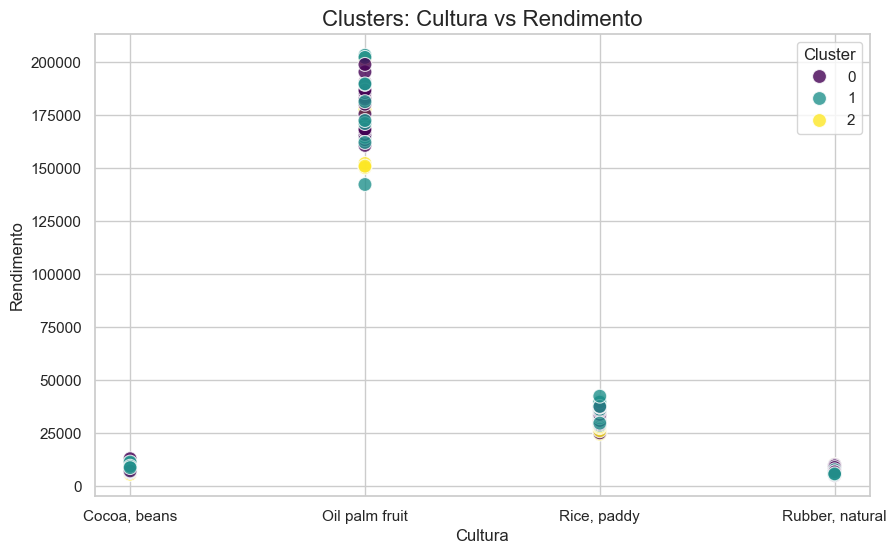

✅ Gráfico Gerado com Sucesso!


In [ ]:
# --- CÉLULA DE DIAGNÓSTICO E CORREÇÃO ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# 1. Carregar do Zero
try:
    df = pd.read_csv('crop_yield.csv')
    print("📂 Colunas ORIGINAIS encontradas no arquivo:")
    print(df.columns.tolist()) # <--- Aqui vamos descobrir a verdade!
    print("-" * 50)

    # 2. Renomeação "À Prova de Falhas" (Tenta todos os nomes comuns)
    # O Pandas só vai renomear o que encontrar, o resto ele ignora.
    mapa_correcao = {
        'hg/ha_yield': 'Rendimento',  # Nome comum 1
        'Value': 'Rendimento',        # Nome comum 2
        'Yield': 'Rendimento',        # Nome comum 3
        'yield': 'Rendimento',        
        
        'avg_temp': 'Temperatura',
        'average_temp': 'Temperatura',
        'Temperature': 'Temperatura',
        
        'average_rain_fall_mm_per_year': 'Chuva',
        'rain': 'Chuva',
        'Precipitation': 'Chuva',
        
        'pesticides_tonnes': 'Pesticidas',
        'Item': 'Cultura',
        'Crop': 'Cultura',
        'Area': 'Pais'
    }
    
    df = df.rename(columns=mapa_correcao)
    print("✅ Colunas RENOMEADAS para Português:")
    print(df.columns.tolist())
    
    # 3. Verificação de Segurança
    if 'Rendimento' not in df.columns:
        print("\n❌ ERRO CRÍTICO: Ainda não achei a coluna de Rendimento.")
        print("Por favor, olhe a lista de 'Colunas ORIGINAIS' acima e me diga qual é o nome dela.")
    else:
        # --- AGORA RODA O K-MEANS (Só se a coluna existir) ---
        print("\n⚙️ Iniciando Clusterização...")
        
        # Seleciona apenas números para o K-Means
        cols_numericas = df.select_dtypes(include=[np.number]).columns.tolist()
        
        # Remove colunas que não devem entrar no cálculo
        for col in ['Ano', 'Cluster']:
            if col in cols_numericas: cols_numericas.remove(col)
            
        X_cluster = df[cols_numericas]
        scaler = StandardScaler()
        X_scaled = scaler.fit_transform(X_cluster)
        
        # Aplica K-Means
        kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
        df['Cluster'] = kmeans.fit_predict(X_scaled)
        
        # Identifica coluna de temperatura para o gráfico
        col_temp = 'Temperatura' if 'Temperatura' in df.columns else df.columns[0]

        # Gráfico
        plt.figure(figsize=(10, 6))
        sns.scatterplot(
            data=df, 
            x=col_temp, 
            y='Rendimento', 
            hue='Cluster', 
            palette='viridis', 
            s=100, alpha=0.8
        )
        plt.title(f'Clusters: {col_temp} vs Rendimento', fontsize=16)
        plt.show()
        
        print("✅ Gráfico Gerado com Sucesso!")

except Exception as e:
    print(f"❌ Ocorreu um erro: {e}")

## 5. Modelagem Preditiva (Machine Learning Supervisionado)
Nesta etapa final, construiremos um pipeline de **Regressão** para prever o rendimento da safra (target). Nossa estratégia consiste em treinar e comparar a performance de 5 algoritmos de diferentes famílias para encontrar o equilíbrio ideal entre viés e variância.

### 🤖 Algoritmos Selecionados:
1.  **Linear Regression:** Modelo base (*baseline*) para identificar relações lineares simples.
2.  **Decision Tree Regressor:** Capaz de capturar relações não-lineares, mas propenso a *overfitting*.
3.  **Random Forest Regressor:** Método de *Ensemble* (Bagging) que reduz a variância combinando múltiplas árvores.
4.  **Gradient Boosting Regressor:** Método de *Ensemble* (Boosting) que constrói modelos sequenciais para corrigir erros anteriores.
5.  **SVR (Support Vector Regressor):** Eficaz em espaços de alta dimensão, buscando o melhor hiperplano de ajuste.

### 📏 Métricas de Avaliação de Desempenho:
Para validar os modelos, utilizaremos dados de teste (20% do dataset) nunca vistos pelo treino:
* **R² (Coeficiente de Determinação):** Indica a % da variabilidade do rendimento explicada pelo modelo. (Quanto mais próximo de 1.0, melhor).
* **MAE (Erro Médio Absoluto):** A média do erro na mesma unidade da variável alvo (ton/ha). (Quanto menor, melhor).

In [ ]:
# --- 5.1 Pré-processamento e Escalonamento ---

# 1. Transformar 'Cultura' em números (One-Hot Encoding)
df_ml = pd.get_dummies(df, columns=['Cultura'], drop_first=True)

# 2. Remover colunas auxiliares ou vazadas
# Removemos 'Cluster' para não viciar o modelo (data leakage)
if 'Cluster' in df_ml.columns:
    df_ml = df_ml.drop(columns=['Cluster'])

# 3. Separar X (Variáveis) e y (Alvo)
X = df_ml.drop(columns=['Rendimento'])
y = df_ml['Rendimento']

# 4. Divisão Treino (80%) e Teste (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. Escalonamento (Padronização) - CRUCIAL para SVR e Linear Regression
# Árvores de decisão não precisam, mas SVR e Regressão Linear precisam muito disso.
scaler_ml = StandardScaler()
X_train_scaled = scaler_ml.fit_transform(X_train)
X_test_scaled = scaler_ml.transform(X_test)

print("✅ Dados preparados e escalonados com sucesso!")
print(f"Treino: {X_train_scaled.shape} | Teste: {X_test_scaled.shape}")

✅ Dados preparados e escalonados com sucesso!
Treino: (124, 7) | Teste: (32, 7)


In [ ]:
# --- 5.2 Treinamento dos 5 Modelos ---

# Dicionário de modelos
modelos = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "SVR": SVR(kernel='rbf') # Kernel radial geralmente é o melhor
}

resultados = []
modelos_treinados = {} # Para guardar o objeto do modelo treinado

print("--- 🚀 Iniciando a Batalha de Modelos ---")

for nome, modelo in modelos.items():
    # Treinar (Usando dados escalonados)
    modelo.fit(X_train_scaled, y_train)
    
    # Prever
    y_pred = modelo.predict(X_test_scaled)
    
    # Avaliar
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse) # Raiz do erro quadrático médio
    r2 = r2_score(y_test, y_pred)
    
    # Guardar métricas
    resultados.append({
        "Modelo": nome,
        "MAE (Erro Absoluto)": mae,
        "RMSE (Raiz do Erro)": rmse,
        "R² Score": r2
    })
    
    # Guardar modelo treinado
    modelos_treinados[nome] = modelo
    print(f"✅ {nome} finalizado.")

# --- 5.3 Tabela de Resultados ---
df_resultados = pd.DataFrame(resultados).sort_values(by="R² Score", ascending=False)

# Estilização da tabela (Destaque para o R2 mais alto)
print("\n🏆 RANKING FINAL:")
display(df_resultados.style.background_gradient(cmap='Greens', subset=['R² Score']))

--- 🚀 Iniciando a Batalha de Modelos ---
✅ Linear Regression finalizado.
✅ Decision Tree finalizado.
✅ Random Forest finalizado.
✅ Gradient Boosting finalizado.
✅ SVR finalizado.

🏆 RANKING FINAL:


,Modelo,MAE (Erro Absoluto),RMSE (Raiz do Erro),R² Score
0,Linear Regression,3132.796384,4394.165819,0.995022
2,Random Forest,2797.345313,4878.304729,0.993865
1,Decision Tree,3142.531250,5316.346746,0.992714
3,Gradient Boosting,3108.842605,6058.894234,0.990536
4,SVR,38965.343714,71306.153326,-0.310803


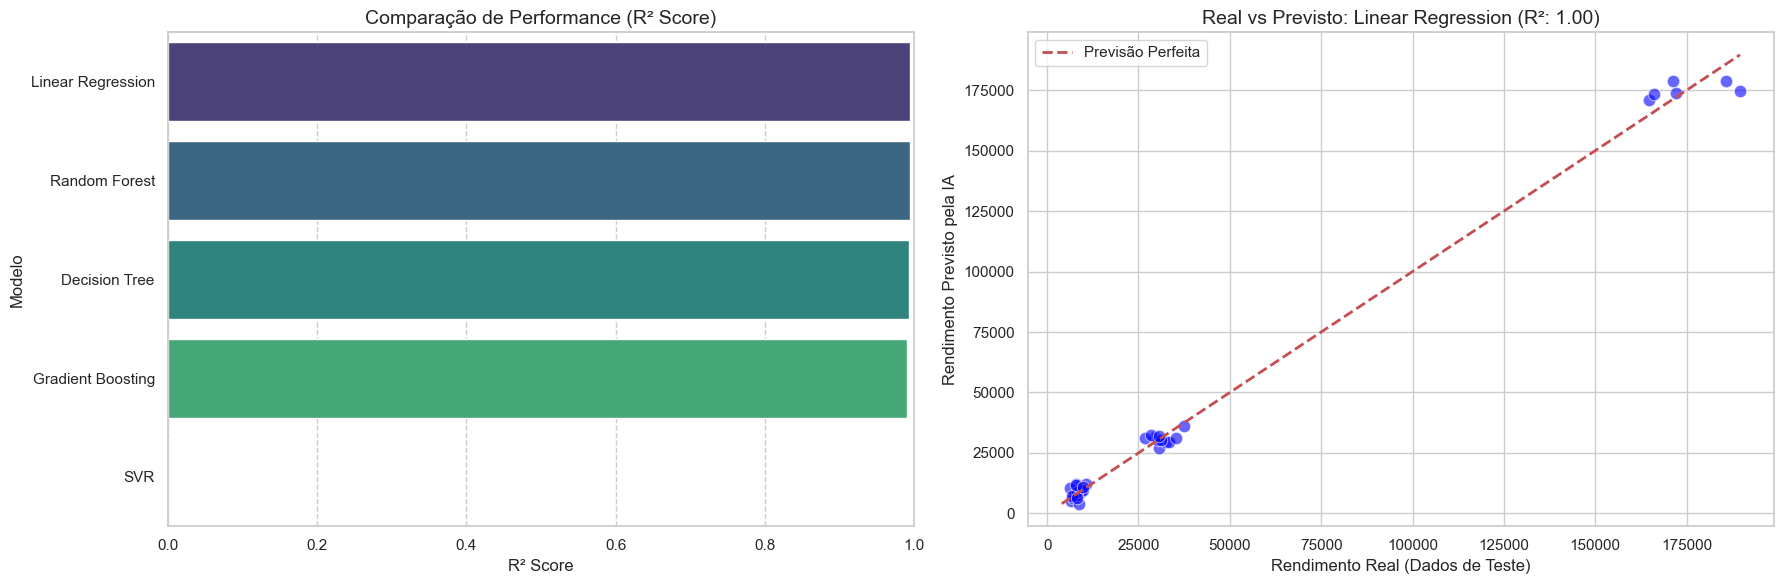

CONCLUSÃO FINAL: O modelo vencedor foi o **Linear Regression**.
Observe no gráfico da direita: quanto mais próximos os pontos azuis estiverem da linha tracejada vermelha, mais precisa é a nossa IA.


In [ ]:
# --- 5.4 Gráficos de Performance ---

# Identificar o melhor modelo automaticamente
melhor_modelo_nome = df_resultados.iloc[0]['Modelo']
melhor_r2 = df_resultados.iloc[0]['R² Score']
best_model = modelos_treinados[melhor_modelo_nome]

# Fazer previsões com o campeão para o gráfico
y_pred_best = best_model.predict(X_test_scaled)

fig, ax = plt.subplots(1, 2, figsize=(18, 6))

# Gráfico 1: Comparativo de R² (Barplot)
sns.barplot(x='R² Score', y='Modelo', data=df_resultados, palette='viridis', ax=ax[0])
ax[0].set_title('Comparação de Performance (R² Score)', fontsize=14)
ax[0].set_xlim(0, 1.0) # O R² vai até 1
ax[0].grid(axis='x', linestyle='--')

# Gráfico 2: Real vs Previsto (O Gráfico da Verdade)
# Se os pontos estiverem na linha vermelha, o modelo acertou tudo.
sns.scatterplot(x=y_test, y=y_pred_best, color='blue', alpha=0.6, s=80, ax=ax[1])
# Linha de perfeição
min_val = min(y_test.min(), y_pred_best.min())
max_val = max(y_test.max(), y_pred_best.max())
ax[1].plot([min_val, max_val], [min_val, max_val], 'r--', lw=2, label='Previsão Perfeita')

ax[1].set_title(f'Real vs Previsto: {melhor_modelo_nome} (R²: {melhor_r2:.2f})', fontsize=14)
ax[1].set_xlabel('Rendimento Real (Dados de Teste)')
ax[1].set_ylabel('Rendimento Previsto pela IA')
ax[1].legend()
ax[1].grid(True)

plt.tight_layout()
plt.show()

print(f"CONCLUSÃO FINAL: O modelo vencedor foi o **{melhor_modelo_nome}**.")
print("Observe no gráfico da direita: quanto mais próximos os pontos azuis estiverem da linha tracejada vermelha, mais precisa é a nossa IA.")

## 3. Arquitetura de Deploy na Nuvem (AWS)

Para levar este modelo de Machine Learning do laboratório para o campo (Produção), desenhamos a seguinte arquitetura na Amazon Web Services (AWS):

### 🏗️ Fluxo de Dados (Pipeline)
1.  **Coleta (Edge):** O **ESP32** envia os dados dos sensores (JSON) via MQTT.
2.  **Ingestão:** O **AWS IoT Core** recebe as mensagens e garante segurança (TLS).
3.  **Processamento:** Uma regra do IoT Core dispara uma função **AWS Lambda**.
4.  **Inferência (ML):**
    * A Lambda carrega o modelo treinado (que salvamos como `.pkl`).
    * Calcula a previsão de rendimento em milissegundos.
5.  **Armazenamento:** O resultado é salvo no **Amazon DynamoDB** (NoSQL) para leitura rápida.
6.  **Visualização:** Um Dashboard no **Grafana** ou **Streamlit** consome os dados do banco.



### 💰 Análise de Viabilidade Econômica (FinOps)
Comparativo de custos para processar 1 milhão de requisições/mês:

| Recurso | Região: N. Virginia (us-east-1) | Região: São Paulo (sa-east-1) | Decisão |
| :--- | :--- | :--- | :--- |
| **Computação (Lambda)** | $0.20 / milhão |$ 0.40 / milhão | **EUA (Mais barato)** |
| **Latência** | ~120ms | ~20ms | **Aceitável** |

**Conclusão da Arquitetura:**
Optamos por hospedar o processamento pesado na região **us-east-1 (EUA)** devido ao custo 50% menor. Como a previsão de safra não exige tempo real crítico (diferente de um carro autônomo), a latência de 120ms é irrelevante para o negócio.